### 목표 : 다중속성(feature)를 기반으로 수치 값 예측
- Data    : fish.csv
- feature : 4 ( Length, Width, Diagonal, Height, Width )
- target  : Weight 수치 값
- 학습유형: 지도학습 + 회귀
- 알고리즘: 데이터 확인 후 결정

1. module loading, data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#data
datafile = '../data/fish.csv'

#bream 행만 추출: 35개
dataDF = pd.read_csv(datafile, nrows=35, usecols=[1,2,3,4,5])

In [5]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    35 non-null     int64  
 1   Length    35 non-null     float64
 2   Diagonal  35 non-null     float64
 3   Height    35 non-null     float64
 4   Width     35 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


2. 데이터 확인 <hr>
target - feature relationship: 상관계수, 시각화


In [21]:
# feature - target relationship visualise & numberize
# 매개변수 : row number, col number, target, featurelist,  corr(상관계수 값)
# return : none

def print_feature(nrows, ncols, df, target, features, corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target], df[features[idx]],label = f'corr: {corr[idx]:.2}')
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.legend
    plt.tight_layout()
    plt.show()

In [19]:
corr = dataDF.corr()['Weight'].to_list()
# features = dataDF.columns[1:]

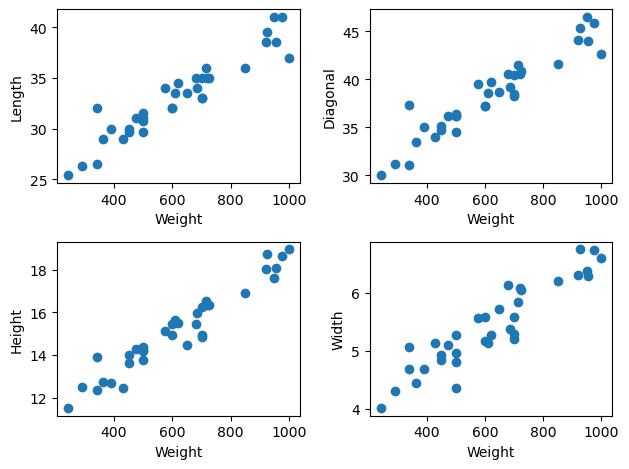

In [20]:
print_feature(2,2, dataDF,dataDF.columns[0], dataDF.columns[1:],corr[1:])

3. 학습 진행 <hr>
- 알고리즘 : 양의 선형 관계=> 선형 모델 
- 학습 데이터 준비 :feature / target 분리, 학습용 / 테스터용 데이터셋 분리
-  피처 값의 범위 비교 : 작은 범위 최댓값 8 ~ 큰 범위 최댓값 50 => 피처 스케일링

(3-1) 학습 데이터 분리 => 피처-타겟, 학습용 데이터셋 - 테스트용 데이터셋 분리



In [22]:
featureDF = dataDF[dataDF.columns[1:]]
featureDF.head(2)


,Length,Diagonal,Height,Width
0,25.4,30.0,11.52,4.0200
1,26.3,31.2,12.48,4.3056


In [23]:

targetDF = dataDF[dataDF.columns[0]]
targetDF.head(2)


0    242
1    290
Name: Weight, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.3, random_state=7)

In [25]:
print(f' [train] x_train ; {X_train.shape}, y_train ; {y_train.shape}')
print(f' [test] x_test ; {X_test.shape}, y_test ; {y_test.shape}')

 [train] x_train ; (24, 4), y_train ; (24,)
 [test] x_test ; (11, 4), y_test ; (11,)


3 -1. feature scaling: train data fit

In [26]:
standard = StandardScaler()
standard.fit(X_train)

StandardScaler()

In [27]:
mmscaler = MinMaxScaler()
mmscaler.fit(X_train)

MinMaxScaler()

In [28]:
robust = RobustScaler()
robust.fit(X_train)

RobustScaler()

In [29]:
# 3 version of scaled dataset
standard_xtrain = standard.transform(X_train)
standard_xtest = standard.transform(X_test)

mmscaled_xtrain = mmscaler.transform(X_train)
mmscaled_xtest = mmscaler.transform(X_test)

robust_xtrain = robust.transform(X_train)
robust_xtest = robust.transform(X_test)

4. 학습 진행
<hr>

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
md = LinearRegression()
md.fit(standard_xtrain, y_train)

print(f'[model Parameter]:\n coef_: {md.coef_}\n intercept: {md.intercept_}')

[model Parameter]:
 coef_: [  5.81124146  56.71151617 108.02781251  28.46942271]
 intercept: 633.9583333333335


5. model grading <hr>
- 훈련용 데이터셋 점수 - 테스트 데이터셋 점수 비교
    * 훈련 점수 >> 테스트 점수 : 과대적합
    * 훈련 점수 ▼, 테스트 점수 ▼ : 과소적합
    * 훈련 점수 ≒ 테스트점수 : 최적적합

In [42]:
train_score = md.score(mmscaled_xtrain, y_train)
test_score = md.score(mmscaled_xtest, y_test)

print(f'Train score: {train_score}\n Test score: {test_score}')

Train score: 0.16555738817009857
 Test score: -0.060906188717523735


In [ ]:
train_score = md.score(standard_xtrain, y_train)
test_score = md.score(standard_xtest, y_test)

print(f'Train score: {train_score}\n Test score: {test_score}')

In [47]:
#스케일러 따라 점수 반환하는 어쩌구 함수 만들기
# 1모델 1스케일러!!! 모델 한 개에 스케일러를 여러 개 먹이면 값이 이상해진다
def scores(feature, target):
    xtrain, xtest, ytrain, ytest = train_test_split(feature, target)
    standard_xtrain = standard.transform(xtrain)
    standard_xtest = standard.transform(xtest)

    mmscaled_xtrain = mmscaler.transform(xtrain)
    mmscaled_xtest = mmscaler.transform(xtest)

    robust_xtrain = robust.transform(xtrain)
    robust_xtest = robust.transform(xtest)
    
    # 학습시키기
    md1 = LinearRegression()
    md1.fit(standard_xtrain, ytrain)
    
    md2 = LinearRegression()
    md2.fit(mmscaled_xtrain, ytrain)
    
    md3 = LinearRegression()
    md3.fit(robust_xtrain, ytrain)
    
    # 테스트 진행
    standard_train_score = md1.score(standard_xtrain, ytrain)
    standard_test_score = md1.score(standard_xtest, ytest)
    
    mm_train_score = md2.score(mmscaled_xtrain, ytrain)
    mm_test_score = md2.score(mmscaled_xtest, ytest)
    
    robust_train_score = md3.score(robust_xtrain, ytrain)
    robust_test_score = md3.score(robust_xtest, ytest)
    
    # 각 툴을 사용하여 점수만 출력하기
    print(f'standard : \n trainscore: {standard_train_score}\n testscore: {standard_test_score}\n')
    print(f'minmax : \n trainscore: {mm_train_score}\n testscore: {mm_test_score}\n')
    print(f'robust : \n trainscore: {robust_train_score}\n testscore: {robust_test_score}\n')
    
    #과대적합 비교하여 적절한 모델 도출하기
    accuracy_standard = abs(standard_train_score - standard_test_score)
    accuracy_robust = abs(robust_train_score - robust_test_score)
    accuracy_minmax = abs(mm_train_score - robust_test_score)
    total = {'minmax':accuracy_minmax, 'robust':accuracy_robust, 'standard':accuracy_standard} 
    
    total.keys() #key 나열
    total. values() # value 나열
    
    print(f'{min(total)}')

In [48]:
scores(featureDF, targetDF)

standard : 
 trainscore: 0.9321261776392255
 testscore: 0.9438132581096702

minmax : 
 trainscore: 0.9321261776392252
 testscore: 0.9438132581096708

robust : 
 trainscore: 0.9321261776392256
 testscore: 0.9438132581096703

minmax


In [51]:
d = {'a' : 2, 'b' : 3, 'c' : 1}
d.keys()
list(d.values())

[2, 3, 1]

In [52]:
vlist = list(d.values())
ind = vlist.index(min(vlist))
list(d.keys())[ind]

'c'